<a href="https://colab.research.google.com/github/Qu1nnD/CS290/blob/main/TeamFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import math
from random import seed
from random import randrange
from math import sqrt
from math import exp
from math import pi
from sklearn.model_selection import train_test_split

In [27]:
shrooms = pd.read_csv("https://raw.githubusercontent.com/Qu1nnD/CS290/main/data/mushroom_cleaned.csv")
shrooms.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [28]:
shrooms.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [29]:
shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [30]:
target="class"
features = shrooms.columns[shrooms.columns != "class"]
features = features[features != "season"]
features

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color'],
      dtype='object')

In [31]:
attribute = "gill-color"

In [32]:
vals = shrooms[ attribute].unique()
vals

array([10,  5,  7,  9,  0,  3, 11,  8,  1,  6,  4,  2])

In [33]:
props = shrooms[ shrooms[attribute] == vals[11] ][target].value_counts( normalize=True )
props

,proportion
class,
1,0.63741
0,0.36259


In [50]:
def Attribute_selection_method(dataset, target, method, classification):
  # If the data mining task is classification
  if(method == "classification"):
    features = dataset.columns[dataset.columns != target]
    entropys=[]
    for attribute in features:
      entropy = 0
      overall = len(dataset)
      # If the classification is using entropy
      if(classification=="entropy"):
        for val in vals:
          # If the attribute is categorical / has less than 20 unique values
          if(len(dataset[attribute].unique())<20):
           subset_size = len(dataset[ dataset[attribute] == val ])
           weight = subset_size / overall
           props = dataset[ dataset[attribute] == val ][target].value_counts( normalize=True )
           for p in props.array:
            entropy =  entropy - weight*(p*math.log2(p))
        # If the attribute is numerical / has more than/equal to 20 unique values
        else:
          entropy = 0
          left = dataset[ dataset[attribute] <= val ][ [attribute,target] ]
          props = left[ target ].value_counts( normalize = True )
          weight = len( left ) / overall
          for prop in props.array:
            entropy = entropy - weight*prop*math.log2( prop )
          right = dataset[ dataset[attribute] > val ][ [attribute,target] ]
          props = right[ target ].value_counts( normalize = True )
          weight = len( right ) / overall
          for prop in props.array:
            entropy = entropy - weight*prop*math.log2( prop )
          entropys.append(entropy)
      # If the classification is using the gini impurity
      else:
        entropy = 1 - sum([p ** 2 for p in props])
        entropy += weight * entropy
        entropys.append(entropy)
    # Sees which is the lowest of all the scores in the list
    minEnt=min(entropys)
    # Finds the index of it in the list
    ind=entropys.index(minEnt)
    # takes that index and finds out which attribute's name in the features list
    return features[ind]

  # If the data mining task is regression
  else:
    # summarize = separate_by_class(dataset)
    separated = dict()
    for i in range(len(dataset)):
      vector = dataset[i]
    class_value = vector[-1]
    if (class_value not in separated):
      separated[class_value] = list()
    separated[class_value].append(vector)
    summarize = separated
    #
    predictions = list()
    #put test into the method
    for row in test:
      #output = predict(summarize, row)
      #
      #probabilities = calculate_class_probabilities(summaries, row)
        total_rows = sum([summaries[label][0][2] for label in summaries])
        probabilityd = dict()
        for class_value, class_summaries in summaries.items():
          probabilityd[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
          mean, stdev, _ = class_summaries[i]
          #probabilityd[class_value] *= calculate_probability(row[i], mean, stdev)
          exponent = exp(-((row[i]-mean)**2 / (2 * stdev**2 )))
          probabilityd[class_value] *=(1 / (sqrt(2 * pi) * stdev)) * exponent
          #
        probabilities=probabilityd
      #
      best_label, best_prob = None, -1
      for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
          best_prob = probability
          best_label = class_value
      output=best_label
      #
      predictions.append(output)
    return(predictions)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 75)

In [51]:
train_set, test_set = train_test_split(shrooms, test_size=0.2)

In [52]:
train_set.columns


Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [55]:
train_set = train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height', 'stem-width', 'stem-color', 'class']]

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,class
46873,963,6,4,5,1.213166,1720,6,0
9849,158,0,0,3,0.493820,131,6,1
4,1305,6,2,10,3.711971,1464,11,1
29765,741,5,1,6,0.788266,1137,11,1
37401,96,2,0,10,1.365219,275,10,1
...,...,...,...,...,...,...,...,...
18408,269,6,0,6,1.186164,556,12,1
45381,856,4,4,10,1.348452,2788,6,1
5414,633,5,1,10,0.175501,803,11,0
43226,1190,6,4,11,0.914742,2157,6,0


In [54]:
test_set = test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'class']]

In [40]:
X_train = train_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
y_train = train_set["class"]

In [41]:
X_test = test_set[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color']]
y_test = test_set["class"]

In [42]:
cat_attributes=[]
num_attributes=[]
for col in X_train.columns:
  if len(X_train[col].unique()) < 20:
    cat_attributes.append(col)
  else:
    num_attributes.append(col)
cat_attributes

['cap-shape', 'gill-attachment', 'gill-color', 'stem-color']

In [43]:
trf = [ ('num', StandardScaler(), num_attributes),
       ('cat', OneHotEncoder( handle_unknown='ignore'), cat_attributes) ]
col_transform = ColumnTransformer( transformers = trf )

In [44]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])


In [45]:
cv_scores=cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')
cv_scores

array([0.66261855, 0.65521628, 0.6475827 , 0.65066512, 0.6551764 ])

In [46]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['cap-diameter',
                                                   'stem-height',
                                                   'stem-width']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cap-shape',
                                                   'gill-attachment',
                                                   'gill-color',
                                                   'stem-color'])])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [48]:
predictions = pipeline.predict( X_test )
cm = confusion_matrix( y_test, predictions )
cm

array([[4027,  927],
       [2736, 3117]])

[Text(0.5, 0.875, 'x[2] <= -0.411\ngini = 0.495\nsamples = 43228\nvalue = [19406.0, 23822.0]'),
 Text(0.25, 0.625, 'x[1] <= 0.043\ngini = 0.429\nsamples = 18505\nvalue = [5760, 12745]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[40] <= 0.5\ngini = 0.485\nsamples = 11479\nvalue = [4749, 6730]'),
 Text(0.0625, 0.125, 'gini = 0.45\nsamples = 8129\nvalue = [2779, 5350]'),
 Text(0.1875, 0.125, 'gini = 0.484\nsamples = 3350\nvalue = [1970.0, 1380.0]'),
 Text(0.375, 0.375, 'x[20] <= 0.5\ngini = 0.246\nsamples = 7026\nvalue = [1011.0, 6015.0]'),
 Text(0.3125, 0.125, 'gini = 0.186\nsamples = 6533\nvalue = [677, 5856]'),
 Text(0.4375, 0.125, 'gini = 0.437\nsamples = 493\nvalue = [334, 159]'),
 Text(0.75, 0.625, 'x[2] <= 2.081\ngini = 0.495\nsamples = 24723\nvalue = [13646, 11077]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[14] <= 0.5\ngini = 0.489\nsamples = 22928\nvalue = [13197.0, 9731.0]'),
 Text(0.5625, 0.125, 'gini = 0.498\nsamples = 20153\nvalue = [10670, 9483]'),
 

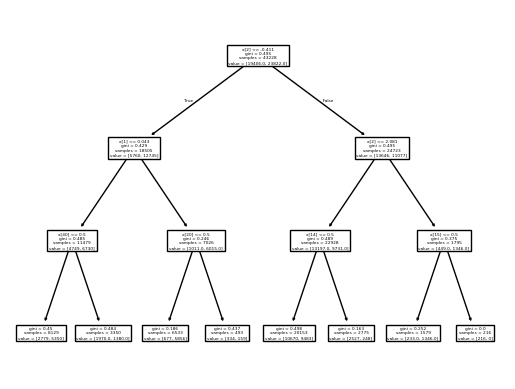

In [47]:
plot_tree( pipeline.named_steps['clf'])